<a href="https://colab.research.google.com/github/heptaclone/Course-Project-Shiny-Application-and-Reproducible-Pitch/blob/main/Diabetes_Type_2_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns

In [ ]:
df = pd.read_csv("diabetes.csv")

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

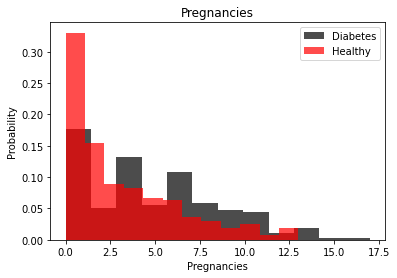

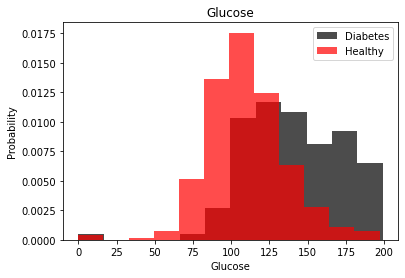

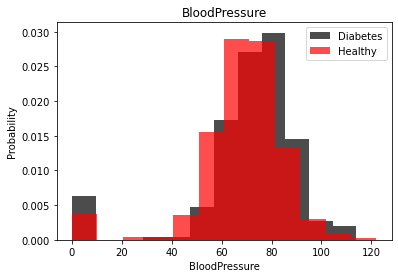

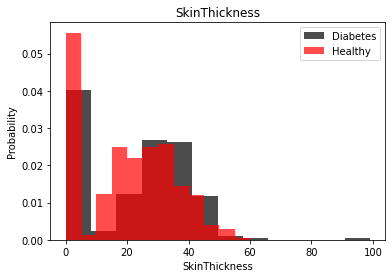

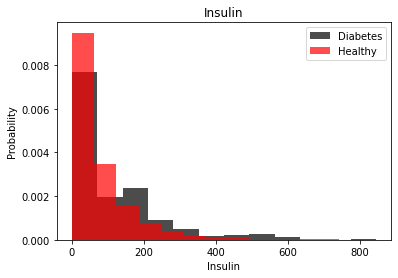

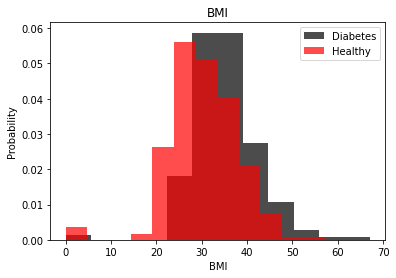

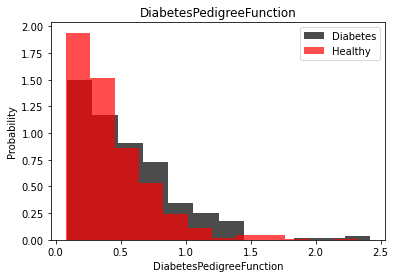

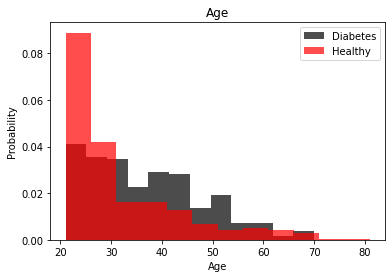

In [ ]:
for i in range(len(df.columns[:-1])):
  label = df.columns[i]
  plt.hist(df[df['Outcome']==1][label], color="black", label = "Diabetes", alpha=0.7, density=True, bins = 12)
  plt.hist(df[df['Outcome']==0][label], color="red", label = "Healthy", alpha=0.7, density=True, bins = 12)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [ ]:
X = df[df.columns[:-1]].values
Y = df[df.columns[-1]].values

In [ ]:
X.shape, Y.shape

((768, 8), (768,))

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
data = np.hstack((X, np.reshape(Y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns = df.columns)

In [ ]:
over = RandomOverSampler()
X, Y = over.fit_resample(X, Y)
data = np.hstack((X, np.reshape(Y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns = df.columns)

In [ ]:
len(transformed_df[transformed_df["Outcome"]==1]), len(transformed_df[transformed_df["Outcome"]==0])

(500, 500)

In [ ]:
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size = 0.4, random_state = 0)
X_valid, X_test, Y_valid, Y_test = train_test_split(X_temp, Y_temp, test_size = 0.5, random_state = 0)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
model.evaluate(X_train, Y_train)

19/19 [==============================] - 1s 3ms/step - loss: 0.7170 - accuracy: 0.4917


[0.7170349359512329, 0.49166667461395264]

In [ ]:
model.evaluate(X_valid, Y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.7263 - accuracy: 0.4900


[0.7263439893722534, 0.49000000953674316]

In [ ]:
model.fit(X_train, Y_train, batch_size=16, epochs=20, validation_data=(X_valid, Y_valid))

Epoch 1/20
38/38 [==============================] - 0s 6ms/step - loss: 0.3686 - accuracy: 0.8467 - val_loss: 0.4079 - val_accuracy: 0.7950
Epoch 2/20
38/38 [==============================] - 0s 4ms/step - loss: 0.3669 - accuracy: 0.8500 - val_loss: 0.4040 - val_accuracy: 0.8050
Epoch 3/20
38/38 [==============================] - 0s 4ms/step - loss: 0.3663 - accuracy: 0.8517 - val_loss: 0.4098 - val_accuracy: 0.8000
Epoch 4/20
38/38 [==============================] - 0s 5ms/step - loss: 0.3645 - accuracy: 0.8500 - val_loss: 0.4036 - val_accuracy: 0.8050
Epoch 5/20
38/38 [==============================] - 0s 4ms/step - loss: 0.3641 - accuracy: 0.8450 - val_loss: 0.4069 - val_accuracy: 0.8150
Epoch 6/20
38/38 [==============================] - 0s 4ms/step - loss: 0.3617 - accuracy: 0.8517 - val_loss: 0.4053 - val_accuracy: 0.7950
Epoch 7/20
38/38 [==============================] - 0s 5ms/step - loss: 0.3612 - accuracy: 0.8517 - val_loss: 0.4051 - val_accuracy: 0.7950
Epoch 8/20
38/38 [==

In [ ]:
model.evaluate(X_test, Y_test)

7/7 [==============================] - 0s 5ms/step - loss: 0.5169 - accuracy: 0.7750


[0.5168646574020386, 0.7749999761581421]